## Sprint 4: Data Preprocessing 

This notebook take the given dataset(vehicles_us.csv), cleans up the data, and plots two graphs with plotly express.


The ipynb should contain a project with a title, introduction, comments along the way, with a final output.


In [1]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

Channels:
 - defaults
 - plotly
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [2]:
import streamlit as st
import pandas as pd
import math as mt
import numpy as np
import plotly.express as px
# All required packadges
sys.setrecursionlimit(60000) # necessary to avoid recursion errors later

In [3]:
vehicles=pd.read_csv('/Users/jarrelking/TTSprin4/vehicles_us.csv',sep=',')
vehicles.sample(25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
18079,19500,2012.0,jeep wrangler,excellent,6.0,gas,77285.0,manual,SUV,orange,1.0,2018-09-14,4
1005,12900,2010.0,chevrolet silverado 1500,excellent,8.0,gas,159563.0,automatic,pickup,white,1.0,2018-06-24,27
9676,31000,2017.0,ford f-250 super duty,like new,8.0,diesel,87000.0,automatic,pickup,white,1.0,2019-01-11,25
51082,32995,2017.0,ram 2500,excellent,NaN,diesel,81000.0,automatic,truck,white,1.0,2018-08-09,33
16096,3000,2001.0,ford ranger,good,6.0,gas,NaN,automatic,pickup,black,1.0,2019-03-09,8
3873,3200,2011.0,nissan sentra,excellent,NaN,gas,NaN,automatic,coupe,NaN,NaN,2018-08-25,37
34908,13988,2014.0,ford focus,good,4.0,gas,96479.0,manual,hatchback,red,NaN,2018-11-26,37
44196,2500,2011.0,chevrolet tahoe,excellent,8.0,gas,165200.0,automatic,SUV,NaN,NaN,2019-03-03,33
2884,6500,2001.0,ram 2500,good,6.0,diesel,235000.0,automatic,truck,blue,NaN,2018-06-24,33
4208,4200,2005.0,ram 1500,good,6.0,gas,95000.0,automatic,truck,silver,1.0,2018-10-15,10


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Based on the sample data set I am going to move forward wth the fllowing assumptions:
####    - Nan values on the 4wd section mean it is not 4 wheel drve
####    - model_year: fill by median year (don4t drop rows with NaNs in this column) 
####    - cylindres: fill by median cylindres 
####    - Removing  vehices priced over 60K.
####    - Removing vehicls with missing odometer data. Mileage is a very important determning factor on buying a vehicle, and if you don't know what it is I persnally woudn't buy it. Too big of a risk
    

In [5]:
#vehicles['model_year'].fillna(vehicles['model_year'].median(), inplace=True)
#vehicles['cylinders'].fillna(vehicles['cylinders'].median(), inplace=True)
#vehicles['cylinders'].fillna(vehicles['cylinders'].median(), inplace=True)
def median_fill(df, column):
    df[column].fillna(df[column].median(), inplace=True)
    return df
median_fill(vehicles,"cylinders")
median_fill(vehicles,"model_year")
#median_fill(vehicles,"odometer") I get a recursion error when I do this, but my original reasoning for dropping these was ecause mileage is a very important determning factor on buying a vehicle, 
# and if you don't know what it isI persnally woudnt not buy it. Too big of a risk
vehicles['odometer'].dropna()
vehiclesv1=vehicles


odometer: group by model year(or year+model) fill by median(mean) odometer 

In [7]:
vehiclesv1['is_4wd'].replace(1,'Yes', inplace=True)
vehiclesv1['is_4wd'].fillna('No',inplace=True)
vehiclesv1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  object 
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


How do you change the data type to an int?

In [8]:
vehiclesv1['make'] = vehiclesv1['model'].str.split(expand=True)[0]

In [20]:
vehiclesv1 = vehiclesv1[vehiclesv1['model_year']>= 1980]
vehiclesv1 = vehiclesv1[vehiclesv1['price']<= 60000]

In [21]:
vehiclesv1['make'].value_counts()

make
ford             12588
chevrolet        10473
toyota            5443
honda             3483
ram               3309
jeep              3276
nissan            3207
gmc               2373
subaru            1271
dodge             1251
hyundai           1173
volkswagen         869
chrysler           837
kia                585
cadillac           316
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: count, dtype: int64

I want 5 graphs: one that shows the days listed by brand, day listed by model year,distribution of vehice types, distribution of price, price and fuel 

In [22]:
vehiclesv2=vehiclesv1.groupby(['type','model_year'])['price'].median().reset_index()

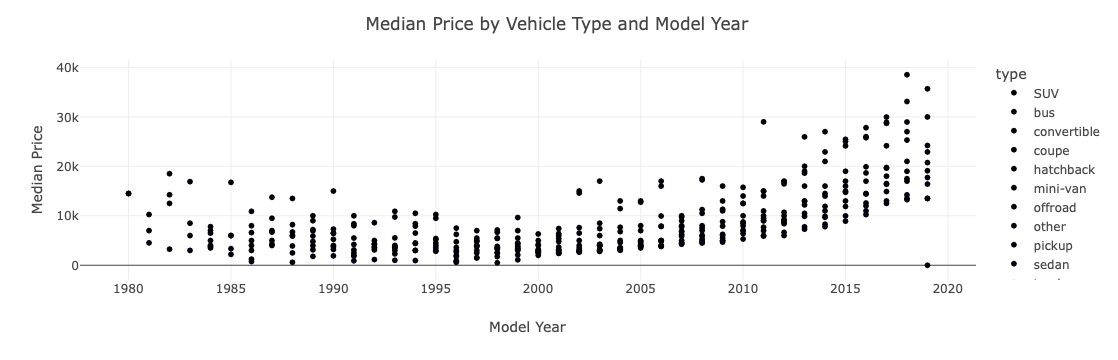

In [23]:
fig1= px.scatter(vehiclesv2, x='model_year', y='price', color='type')
fig1.update_layout(title_text= 'Median Price by Vehicle Type and Model Year', xaxis_title='Model Year', yaxis_title='Median Price')
fig1.show()

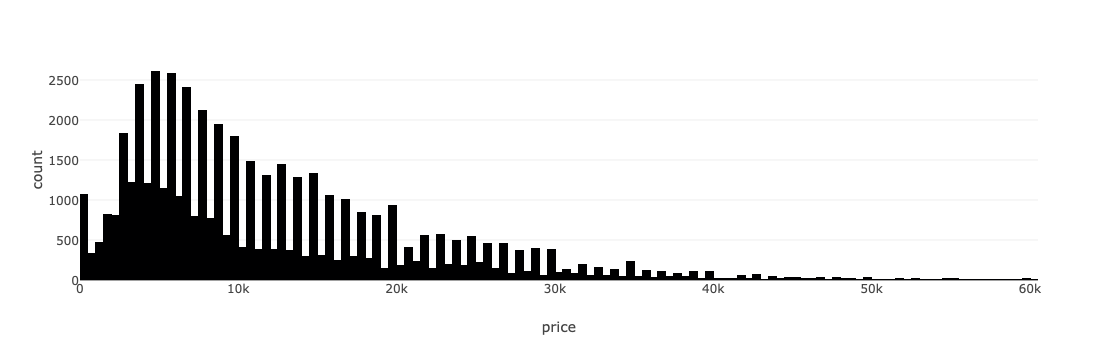

In [24]:
fig4=px.histogram(vehiclesv1, x='price')
fig4.show()

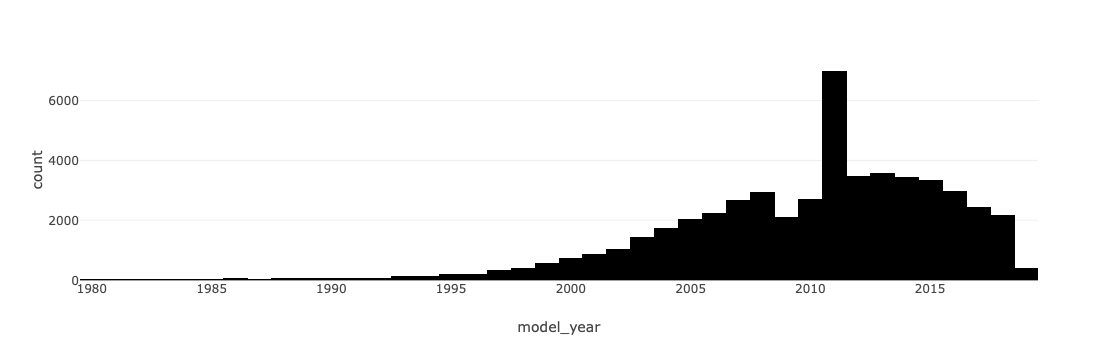

In [33]:
fig2 = px.histogram(vehiclesv1, x='model_year')

fig2.show()